In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_traffic_data = pd.read_csv('./Metro_Interstate_Traffic_Volume.csv')

In [163]:
df_traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [164]:
df_traffic_data.shape

(48204, 9)

In [165]:
df_traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [166]:
df_traffic_data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [167]:
df_traffic_data.describe(include='object')

,holiday,weather_main,weather_description,date_time
count,48204,48204,48204,48204
unique,12,11,38,40575
top,None,Clouds,sky is clear,2013-05-19 10:00:00
freq,48143,15164,11665,6


In [168]:
df_traffic_data['date_time'] = pd.to_datetime(df_traffic_data.date_time)
df_traffic_data['weekday'] = df_traffic_data.date_time.dt.weekday
df_traffic_data['date'] = df_traffic_data.date_time.dt.date
df_traffic_data['hour'] = df_traffic_data.date_time.dt.hour
df_traffic_data['month'] = df_traffic_data.date_time.dt.month
df_traffic_data['year'] = df_traffic_data.date_time.dt.year

In [169]:
# hourly cycle 
df_traffic_data['hour_sin'] = np.sin(2 * np.pi * df_traffic_data['hour'] / 24)
df_traffic_data['hour_cos'] = np.cos(2 * np.pi * df_traffic_data['hour'] / 24)

# day of week cycle 
df_traffic_data['day_of_week_sin'] = np.sin(2 * np.pi * df_traffic_data['weekday'] / 7)
df_traffic_data['day_of_week_cos'] = np.cos(2 * np.pi * df_traffic_data['weekday'] / 7)

# monthly cycle 
df_traffic_data['month_sin'] = np.sin(2 * np.pi * df_traffic_data['month'] / 12)
df_traffic_data['month_cos'] = np.cos(2 * np.pi * df_traffic_data['month'] / 12)

# yearly cycle 
df_traffic_data['year_sin'] = np.sin(2 * np.pi * df_traffic_data['year'] / 365.25)
df_traffic_data['year_cos'] = np.cos(2 * np.pi * df_traffic_data['year'] / 365.25)

df_traffic_data.set_index('date_time', inplace=True)

df_traffic_data.drop(['weekday', 'date', 'hour', 'month', 'year'], axis=1, inplace=True)
df_traffic_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,hour_sin,hour_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos,year_sin,year_cos
date_time,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,7.071068e-01,-0.707107,0.781831,0.62349,-0.866025,5.000000e-01,-0.053732,-0.998555
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,5.000000e-01,-0.866025,0.781831,0.62349,-0.866025,5.000000e-01,-0.053732,-0.998555
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2.588190e-01,-0.965926,0.781831,0.62349,-0.866025,5.000000e-01,-0.053732,-0.998555
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,1.224647e-16,-1.000000,0.781831,0.62349,-0.866025,5.000000e-01,-0.053732,-0.998555
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,-2.588190e-01,-0.965926,0.781831,0.62349,-0.866025,5.000000e-01,-0.053732,-0.998555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,None,283.45,0.0,0.0,75,Clouds,broken clouds,3543,-9.659258e-01,0.258819,-0.781831,0.62349,-1.000000,-1.836970e-16,-0.156328,-0.987705
2018-09-30 20:00:00,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2781,-8.660254e-01,0.500000,-0.781831,0.62349,-1.000000,-1.836970e-16,-0.156328,-0.987705
2018-09-30 21:00:00,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159,-7.071068e-01,0.707107,-0.781831,0.62349,-1.000000,-1.836970e-16,-0.156328,-0.987705


In [170]:
df_traffic_data['holiday'] = (df_traffic_data['holiday'] != 'None').astype(float)
df_traffic_data['snow_1h'] = df_traffic_data['snow_1h'].apply(lambda x: 0 if x == 0 else 1).astype(float)

# remove temp outliers
df_traffic_data['temp'] = df_traffic_data['temp'] - 273.15
df_traffic_data = df_traffic_data[df_traffic_data['temp'] > -250]

In [171]:
df_traffic_data['weather_description'] = df_traffic_data['weather_description'].map(lambda x:x.lower())
df_traffic_data.weather_description.value_counts()

C:\Users\8778t\AppData\Local\Temp/ipykernel_35280/3977909211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffic_data['weather_description'] = df_traffic_data['weather_description'].map(lambda x:x.lower())


sky is clear                           13381
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thunderstorm with light rain              54
proximity 

In [172]:
df_traffic_data.drop(['weather_description'], axis=1, inplace=True)

C:\Users\8778t\AppData\Local\Temp/ipykernel_35280/390113688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traffic_data.drop(['weather_description'], axis=1, inplace=True)


In [173]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_cols = ['temp', 'rain_1h', 'clouds_all', 'hour_sin', 'hour_cos', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos', 'year_sin', 'year_cos', 'snow_1h', 'holiday']
categorical_cols = ['weather_main']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('oneHot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

X = df_traffic_data.drop('traffic_volume', axis=1)
y = df_traffic_data['traffic_volume']

X_preprocessed = preprocessor.fit_transform(X)
scaler = StandardScaler()
y_preprocessed = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

df_preprocessed = np.hstack((X_preprocessed, y_preprocessed.reshape(-1, 1)))

# df_preprocessed = preprocessor.fit_transform(df_traffic_data)

In [174]:
def df_to_X_y(df_as_np, window_size=5):
#     df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][-1]
        y.append(label)
        
    return np.array(X), np.array(y)

In [175]:
X, y = df_to_X_y(df_preprocessed)

In [176]:
X.shape, y.shape

((48189, 5, 25), (48189,))

In [177]:
X_train, y_train = X[:40000], y[:40000]
X_val, y_val = X[40000:44000], y[40000:44000]
X_test, y_test = X[44000:], y[44000:]

In [178]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 25)))
model1.add(LSTM(32, return_sequences=True))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 5, 32)             7424      
                                                                 
 lstm_7 (LSTM)               (None, 64)                24832     
                                                                 
 dense_12 (Dense)            (None, 8)                 520       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 32785 (128.07 KB)
Trainable params: 32785 (128.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [179]:
es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10, restore_best_weights=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [180]:
history = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[es])

Epoch 1/50
1250/1250 [==============================] - 8s 5ms/step - loss: 0.3444 - root_mean_squared_error: 0.5868 - val_loss: 0.1816 - val_root_mean_squared_error: 0.4261
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1589 - root_mean_squared_error: 0.3987 - val_loss: 0.1065 - val_root_mean_squared_error: 0.3264
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1123 - root_mean_squared_error: 0.3351 - val_loss: 0.0738 - val_root_mean_squared_error: 0.2718
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0929 - root_mean_squared_error: 0.3047 - val_loss: 0.0612 - val_root_mean_squared_error: 0.2474
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0822 - root_mean_squared_error: 0.2867 - val_loss: 0.0552 - val_root_mean_squared_error: 0.2349
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0749 - root_mean_squared_error: 0.2736 - val_loss: 0

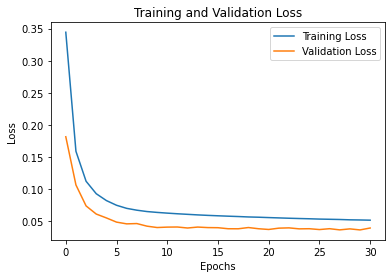

In [181]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')  
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [182]:
train_predictions = model1.predict(X_train)
y_pred_original = scaler.inverse_transform(train_predictions).flatten()
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
train_results = pd.DataFrame(data={'Train Predictions': y_pred_original, 'Actual': y_train_original})
train_results

1250/1250 [==============================] - 3s 2ms/step


,Train Predictions,Actual
0,5374.124023,5181.0
1,5890.481445,5584.0
2,6134.887695,6015.0
3,5458.843750,5791.0
4,4280.075684,4770.0
...,...,...
39995,676.317444,359.0
39996,989.804993,596.0
39997,1349.750610,1016.0
39998,1758.638794,1390.0


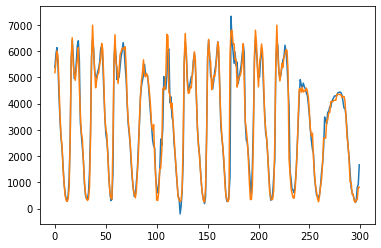

In [190]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:300])
plt.plot(train_results['Actual'][:300])

In [184]:
val_predictions = model1.predict(X_val)
y_pred_original = scaler.inverse_transform(val_predictions).flatten()
y_val_original = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
val_results = pd.DataFrame(data={'Val Predictions': y_pred_original, 'Actual': y_val_original})
val_results

125/125 [==============================] - 0s 2ms/step


,Val Predictions,Actual
0,2761.660645,2819.0
1,3528.898682,3375.0
2,3859.617432,4002.0
3,4254.304199,4175.0
4,4380.852051,4475.0
...,...,...
3995,3037.668213,3134.0
3996,2940.856689,2436.0
3997,2264.643066,1740.0
3998,1465.133057,1107.0


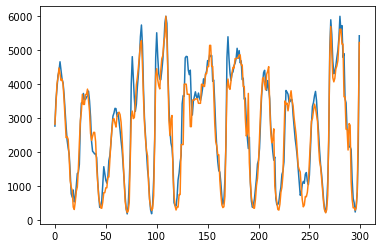

In [189]:
plt.plot(val_results['Val Predictions'][:300])
plt.plot(val_results['Actual'][:300])

In [186]:
test_predictions = model1.predict(X_test)
y_pred_original = scaler.inverse_transform(test_predictions).flatten()
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
test_results = pd.DataFrame(data={'Test Predictions': y_pred_original, 'Actual': y_test_original})
test_results

131/131 [==============================] - 1s 2ms/step


,Test Predictions,Actual
0,331.106232,427.0
1,36.943886,482.0
2,533.758118,440.0
3,924.141663,809.0
4,1481.676392,1428.0
...,...,...
4184,3553.513184,3543.0
4185,2936.871338,2781.0
4186,2280.104248,2159.0
4187,1525.432861,1450.0


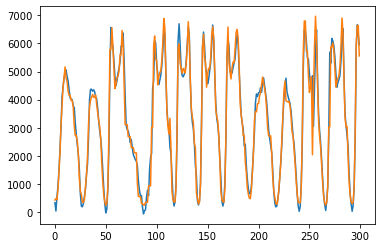

In [191]:
plt.plot(test_results['Test Predictions'][:300])
plt.plot(test_results['Actual'][:300])

1. Accuracy - Based on the observed plot where the predicted values closely match the actual values, and considering the loss metrics, it's fair to conclude that the model demonstrates high accuracy.

2. Potential Pitfalls 
(1) Overfitting -  There is no significant gap between training, validation, and test performance, indicating that overfitting is not a concern.
(2) Feature Selection - Dimensionality was reduced by omitting the weather_description feature.
(3) Data Processing - Temperature outliers were addressed, and snow_1h was converted to a binary format (0 or 1), considering the majority of values are 0.
(4) Temporal dynamics - Cyclical patterns have been encoded to enable the model to capture dynamic temporal relationships effectively.